In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Needed:
 1. How many rows and columns does the dataset contain
 2. What are the datatypes in each column? Are there missing values
 3. What are the mean, median, and standard deviation of the streams column?
 4. What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?
 5. Which track has the highest number of streams? Display the top 5 most streamed tracks.
 6. Who are the top 5 most frequent artists based on the number of tracks in the dataset?
 7. Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
 8.  Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?
 9. Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the      most?
 10. Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?
 11. How do the numbers of tracks in spotify_playlists, deezer_playlists, and apple_playlists compare? Which platform seems to favor the most popular tracks?
 12. Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
 13. Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in      playlists or charts.

In [39]:
# load the file
# use encoding = 'ISO-9959-1' to ensure the characters in the file are read correctly
# if not used, the file would not load
df = pd.read_csv('spotify-2023.csv', encoding = 'ISO-8859-1')
df


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [41]:
# 1. rows and columns

sh = df.shape
print(f"The number of rows and columns in (row, column) is = {sh}")

The number of rows and columns in (row, column) is = (953, 24)


In [43]:
# 2.1 datatypes

datatypes = df.dtypes
print(datatypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [45]:
# 2.2 missing values
# use isnull

nullval = pd.isnull(df).sum()
print(nullval)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [47]:
# 3.mean, median, and stdev of streams column

# since the datatype of stream is initially an object, convert it to a numeric value
# since there is a specific row in the streams column that is not a numeric value therefore use errors = 'coerce' to turn it to NaN
df['streams'] = pd.to_numeric(df['streams'], errors = 'coerce')  
print(f"The data type of column 'stream' is now {df['streams'].dtypes}")

# mean
dfmean = df['streams'].mean()

# median
dfmedian =  df['streams'].median()

# standard deviation
dfstdev = df['streams'].std()

print(f"Mean:{dfmean}")
print(f"Median:{dfmedian}")
print(f"Standard deviation:{dfstdev}")

The data type of column 'stream' is now float64
Mean:514137424.93907565
Median:290530915.0
Standard deviation:566856949.0388832


In [49]:
# just to check for no.3. also check in excel
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139e+00,8.930442e-01,1.0,1.0,1.0,2.0,8.000000e+00
released_year,953.0,2.018238e+03,1.111622e+01,1930.0,2020.0,2022.0,2022.0,2.023000e+03
released_month,953.0,6.033578e+00,3.566435e+00,1.0,3.0,6.0,9.0,1.200000e+01
released_day,953.0,1.393075e+01,9.201949e+00,1.0,6.0,13.0,22.0,3.100000e+01
in_spotify_playlists,953.0,5.200125e+03,7.897609e+03,31.0,875.0,2224.0,5542.0,5.289800e+04
in_spotify_charts,953.0,1.200944e+01,1.957599e+01,0.0,0.0,3.0,16.0,1.470000e+02
streams,952.0,5.141374e+08,5.668569e+08,2762.0,141636175.0,290530915.0,673869022.0,3.703895e+09
in_apple_playlists,953.0,6.781217e+01,8.644149e+01,0.0,13.0,34.0,88.0,6.720000e+02
in_apple_charts,953.0,5.190871e+01,5.063024e+01,0.0,7.0,38.0,87.0,2.750000e+02
in_deezer_charts,953.0,2.666317e+00,6.035599e+00,0.0,0.0,0.0,2.0,5.800000e+01


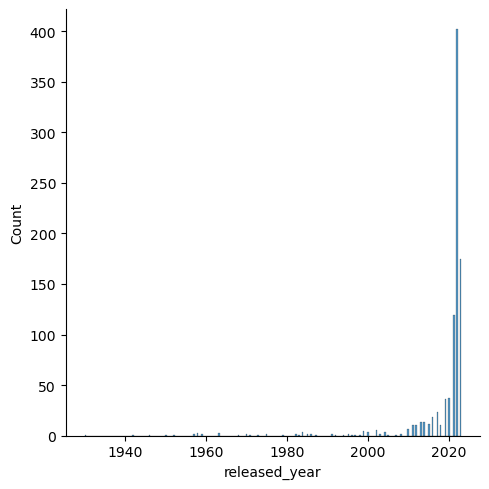

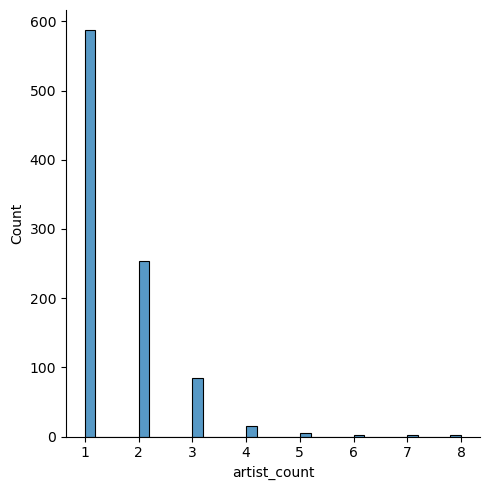

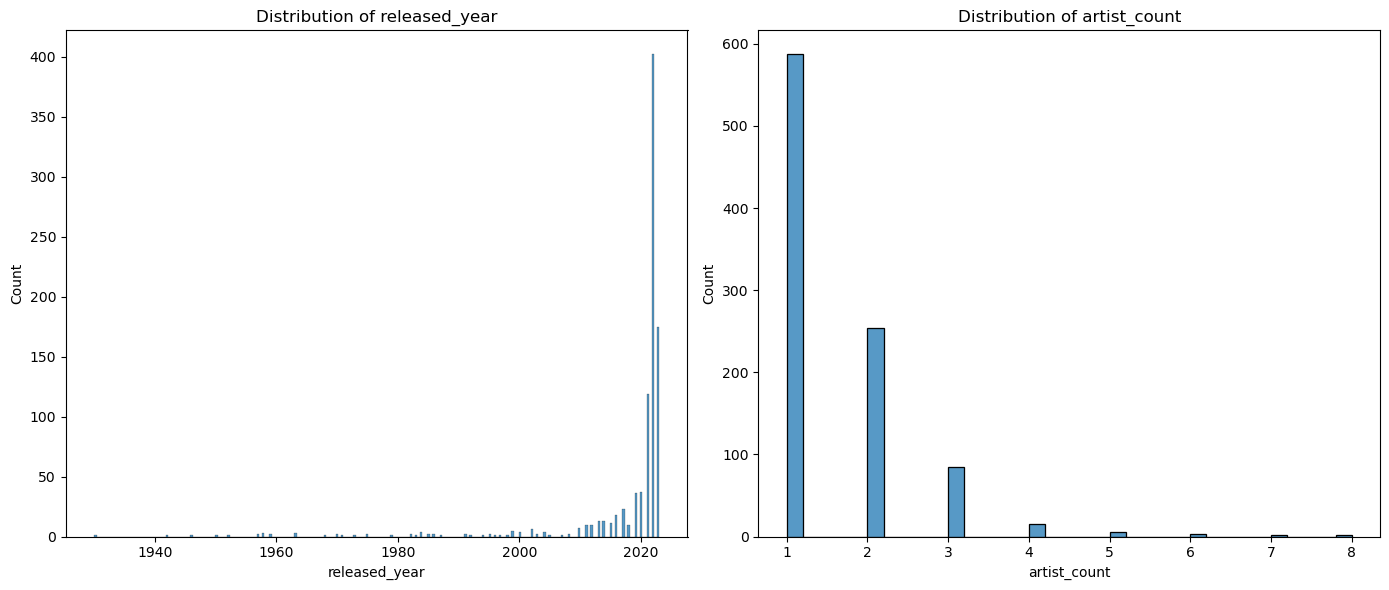

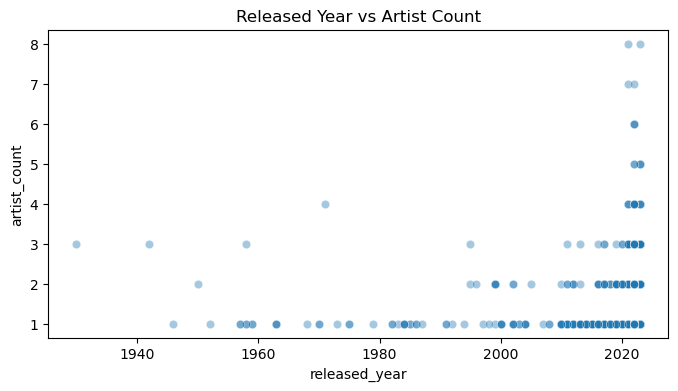

In [51]:
# 4
# just to show using displot (not needed)
distrib_yr = sns.displot(df['released_year'], kde = False)
distrib_artist = sns.displot(df['artist_count'], kde = False)
plt.tight_layout()
plt.show(distrib_yr, distrib_artist)


# use histplot to show the two together side-by-side
fig, axes = plt.subplots(1, 2, figsize = (14, 6))

# distribution of released years
sns.histplot(df['released_year'], kde = False, ax = axes[0])
axes[0].set_title('Distribution of released_year')

# distribution of artist count
sns.histplot(df['artist_count'], kde=False, ax = axes[1])
axes[1].set_title('Distribution of artist_count')

plt.tight_layout() 
plt.show()

# for the trends and outliers
plt.figure(figsize = (8, 4))
sns.scatterplot(x = 'released_year', y = 'artist_count', data = df,  alpha = 0.4) #alpha = 0.4 for opacity
plt.title('Released Year vs Artist Count')
plt.show()

In [52]:
# 5 
#sort then .head since top 5
sorted = df.sort_values(by = 'streams', ascending = False)
sorted.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5


artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64
['Taylor Swift', 'The Weeknd', 'Bad Bunny', 'SZA', 'Harry Styles']


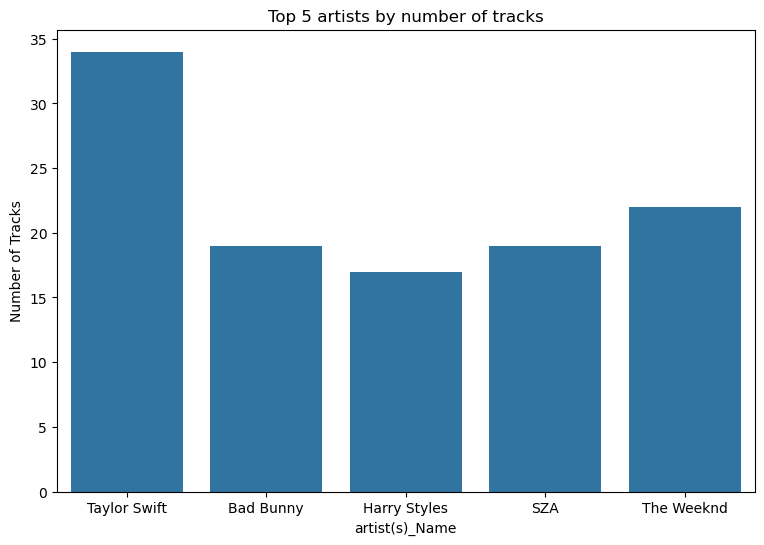

In [53]:
# 6 
# top artists by their number of tracks
counts = df['artist(s)_name'].value_counts().head() # to show the list

#to be used for the graph .head() for the top 5, .index() to have their index values, .tolist() to make it into a list
top5 = counts.head().index.tolist()
print(counts)
print(top5) # just to check if its a list

# use is.in(top5) to filter the values in the artist(s)_name column to those that are in the top5 list
filtered = df[df['artist(s)_name'].isin(top5)]

# graph
plt.figure(figsize = (9, 6))
sns.countplot(x = 'artist(s)_name', data = filtered)
plt.title('Top 5 artists by number of tracks')
plt.xlabel('artist(s)_Name')
plt.ylabel('Number of Tracks')
plt.show()

    released_year  count
0            2022    402
1            2023    175
2            2021    119
3            2020     37
4            2019     36
5            2017     23
6            2016     18
7            2014     13
8            2013     13
9            2015     11
10           2018     10
11           2012     10
12           2011     10
13           2010      7
14           2002      6
15           1999      5
16           1984      4
17           2000      4
18           2004      4
19           1963      3
20           1958      3
21           1995      2
22           1970      2
23           1959      2
24           1985      2
25           1957      2
26           1986      2
27           2003      2
28           1991      2
29           2008      2
30           1975      2
31           1982      2
32           1946      1
33           2005      1
34           1942      1
35           1996      1
36           1998      1
37           1950      1
38           1979      1


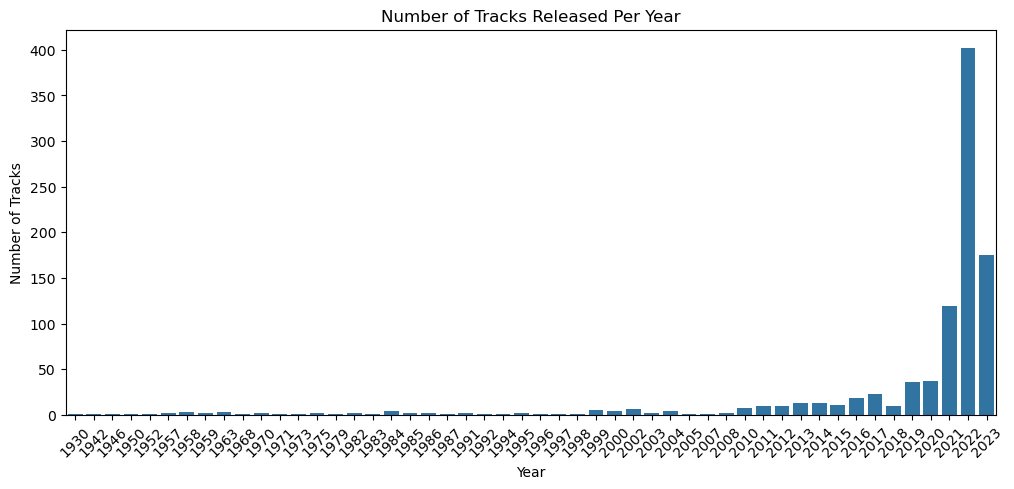

In [54]:
#7 
# tracks released per year

# for the list, use .value_counts() to check for the count of tracks released per year
# .reset_index() to place a corresponding index for the data
track_year = df['released_year'].value_counts().reset_index()
print(track_year) 
track_year.columns = ['released_year', 'num_tracks']

# to show what is the year with the highest tracks released
# use.loc on the corresponding column and .idxmax() to find the index of the highest value
max_year = track_year.loc[track_year['num_tracks'].idxmax(), 'released_year']
# use .max() to find the highest value
max_tracks = track_year['num_tracks'].max() 
# display
print(f"Year {max_year} with {max_tracks} tracks")

# graph
plt.figure(figsize = (12, 5))
sns.barplot(x = 'released_year', y = 'num_tracks', data = track_year) 
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation = 45)
plt.show()

    released_month  count name_month
0                1    134    January
9                2     61   February
2                3     86      March
7                4     66      April
1                5    128        May
3                6     86       June
8                7     62       July
11               8     46     August
10               9     56  September
6               10     73    October
4               11     80   November
5               12     75   December
Month with highest release is January with 134 songs


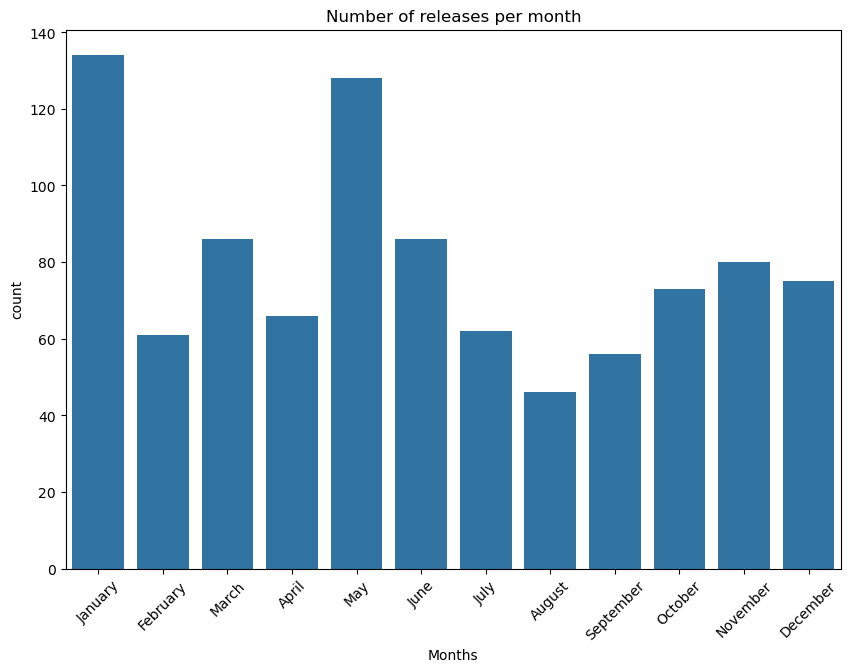

In [55]:
#8 
# Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases

track_month = df['released_month'].value_counts().reset_index().sort_values(by = 'released_month') 

# create a dictionary for the name of the months that is equivalent to their month number
months = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}

# use map to convert the number to the equivalent month in the dictionary
track_month['name_month'] = track_month['released_month'].map(months) 
#print
print(track_month)
# to show the month with the highest release
max_month = track_month.loc[track_month['count'].idxmax(), 'name_month']
month_released = track_month['count'].max()
print(f"Month with highest release is {max_month} with {month_released} songs")

# graph
plt.figure(figsize = (10,7))
sns.barplot(x = 'name_month', y = 'count', data = track_month)
plt.title("Number of releases per month")
plt.xlabel("Months")
plt.xticks(rotation = 45)
plt.show()


Correlation to streams
streams               1.000000
acousticness_%       -0.004485
energy_%             -0.026051
valence_%            -0.040831
instrumentalness_%   -0.044902
liveness_%           -0.048337
danceability_%       -0.105457
speechiness_%        -0.112333
Name: streams, dtype: float64


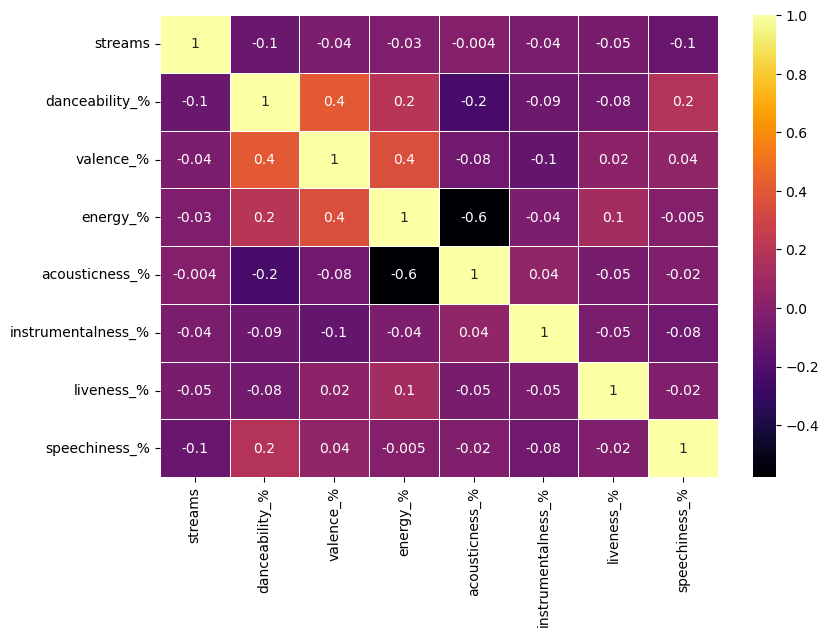

In [56]:
# 9.
# Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. 
# Which attributes seem to influence streams the most?

# use .corr() to get their correlation
correl = df[['streams','danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()

# correl['streams'] to check the relation between streams column from each attribute
correl_streams = correl['streams'].sort_values(ascending = False) 
print("Correlation to streams")
print(correl_streams)

# using a heatmap since heatmaps are the common graphs for correlation
plt.figure(figsize = (9,6))
sns.heatmap(correl, annot = True, cmap = "inferno", fmt = ".1g", linewidths = 0.5)
plt.show()

In [57]:
# 10. 
# Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%
correl_DE = df[['danceability_%', 'energy_%']].corr()
correl_VA = df[['valence_%', 'acousticness_%']].corr()

# it is said that at least 0.6 is needed to show a good correlation

print("The correlation between danceabiity_% and energy_% is")
print(correl_DE)
# meaning that the correlation between danceability and energy is weak, but it shows that the danceability of a song affects only a little of energy and v/v
print()
print("The correlation between valence_% and acousticness_% is")
print(correl_VA)
# meaning that the correlation between the two is weak since the value is close to zero. since it's negative, there is a chance that when
# one decreases, the other one increases too, showing an inverse relationship

The correlation between danceabiity_% and energy_% is
                danceability_%  energy_%
danceability_%        1.000000  0.198095
energy_%              0.198095  1.000000

The correlation between valence_% and acousticness_% is
                valence_%  acousticness_%
valence_%        1.000000       -0.081907
acousticness_%  -0.081907        1.000000


Number of tracks in the categories:
in_spotify_playlists    4955719.0
in_deezer_playlists       95913.0
in_apple_playlists        64625.0
dtype: float64


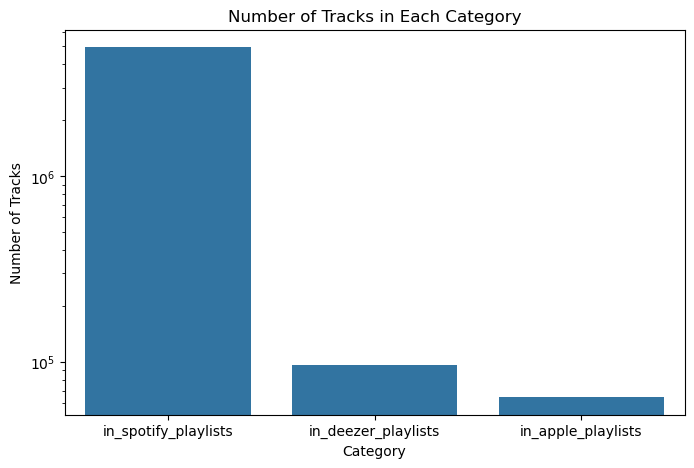

,track_name,artist(s)_name,in_spotify_playlists,in_deezer_playlists,in_apple_playlists
55,Blinding Lights,The Weeknd,43899,"3,421",672
179,Shape of You,Ed Sheeran,32181,"6,808",33
86,Someone You Loved,Lewis Capaldi,17836,"1,800",440
620,Dance Monkey,Tones and I,24529,"3,595",533
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",24094,843,372


In [58]:
# 11.
# How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? 
# Which platform seems to favor the most popular tracks? (based on the results on number 5, spotify is no.1)
# use .sum() to compile the total number of tracks in the playlists
# use .apply(pd.to_numeric, errors='coerce') to apply individually the errors = 'coerce' since initially the datatype of in_deezers_playlist is object
numtrack_playlists = df[['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].apply(pd.to_numeric, errors = 'coerce').sum()
print("Number of tracks in the categories:")
print(numtrack_playlists)

# graph
plt.figure(figsize = (8, 5))
sns.barplot(x = numtrack_playlists.index, y = numtrack_playlists.values)
plt.title("Number of Tracks in Each Category")
plt.xlabel("Category")
plt.yscale('log')
plt.ylabel("Number of Tracks")
plt.show()

# based on the results in number 5, which is the 'sorted' data frame here are the Top 5 tracks with their respective count in the playlists
df.loc[[55, 179, 86, 620, 41], ['track_name', 'artist(s)_name', 'in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].head()

Average streams by mode and key
      mode key       streams
6   Major   E  7.605963e+08
5   Major  D#  6.819623e+08
3   Major  C#  6.285883e+08
1   Major  A#  6.275336e+08
19  Minor  F#  5.954921e+08
13  Minor   B  5.825110e+08
4   Major   D  5.720180e+08
14  Minor  C#  5.665252e+08
10  Major  G#  5.458044e+08
7   Major   F  5.279311e+08
17  Minor   E  5.083264e+08
9   Major   G  4.929813e+08
12  Minor  A#  4.849231e+08
16  Minor  D#  4.793647e+08
2   Major   B  4.363336e+08
8   Major  F#  4.175450e+08
11  Minor   A  4.173906e+08
18  Minor   F  4.102836e+08
0   Major   A  4.019603e+08
20  Minor   G  3.637593e+08
15  Minor   D  3.425588e+08
21  Minor  G#  3.219036e+08


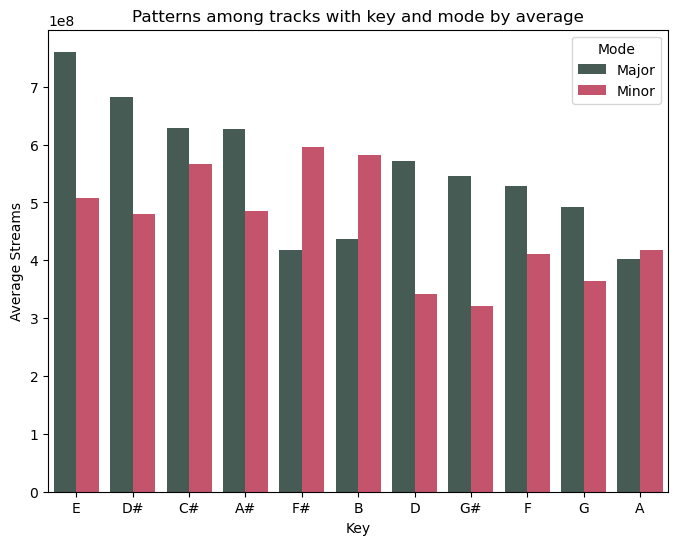

In [61]:
# 12. 
# Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

stream_data = df['mode'].value_counts()
# Calculate the mean streams for each mode
# use .groupby() to get the average of mode and key with respect to streams
stream_data = df.groupby(['mode','key'])['streams'].mean().reset_index()
# sort highest to lowest
sorted_stream = stream_data.sort_values(by = 'streams', ascending = False)
print("Average streams by mode and key\n", sorted_stream)

# graph
plt.figure(figsize = (8, 6))
color = ['#435E55FF','#D64161FF']
sns.barplot(x = 'key', y = 'streams', hue = 'mode', data = sorted_stream, palette = color)
plt.xlabel("Key")
plt.ylabel("Average Streams")
plt.title("Patterns among tracks with key and mode by average") 
plt.legend(title = 'Mode')
plt.show()

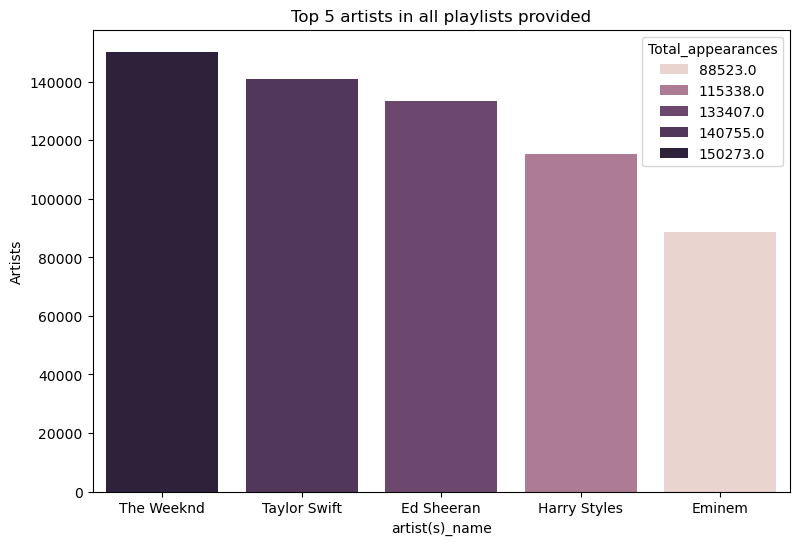

In [63]:
# 13. Do certain genres or artists consistently appear in more playlists or charts? 
# Perform an analysis to compare the most frequently appearing artists in playlists or charts.

# since there are errors when computing with the chosen columns, convert columns to numeric by using errors = 'coerce'
conv_col = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 
            'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']
df[conv_col] = df[conv_col].apply(pd.to_numeric, errors = 'coerce')

# for the appearances of artists
# use groupby to aggregate the appearance of the artist(s) per column
appear = df.groupby('artist(s)_name')[conv_col].sum()
appear['Total_appearances'] = appear.sum(axis = 1)
sorted_appear = appear.sort_values(by = 'Total_appearances', ascending = False).reset_index()

# graph
plt.figure(figsize = (9,6))
sns.barplot(x = 'artist(s)_name', y = 'Total_appearances', hue = 'Total_appearances', data = sorted_appear.head())
plt.title("Top 5 artists in all playlists provided") # it can be Top n, just modify the .head() to .head(n)
plt.ylabel("Artists")
plt.show()
